# Import Required Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering,MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import warnings
warnings.filterwarnings("ignore") 

# Read the data

In [78]:
df = pd.read_csv("Customer Data.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

we have 8950 entries or rows, as well as 17 features. The "Non-Null Count" column shows the number of non-null entries. If the count is 8950 then **there is missing values for  CREDIT_LIMIT, MINIMUM_PAYMENTS  feature.**

In [80]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


The describe() function will provide the statistical information about all numeric values.

In [81]:
df.dtypes.value_counts()

float64    14
int64       3
object      1
Name: count, dtype: int64

The ID is unique, so including it has no meaning; therefore, it should be dropped.

In [82]:
df = df.drop('CUST_ID', axis = 1)

In [83]:
df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


# Missing Value

In [84]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Filling the missing value with median value 

In [85]:
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median())

In [86]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Checking for Duplicates

In [87]:
df.duplicated().sum()

0

In [88]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# Exploratory Data Analysis

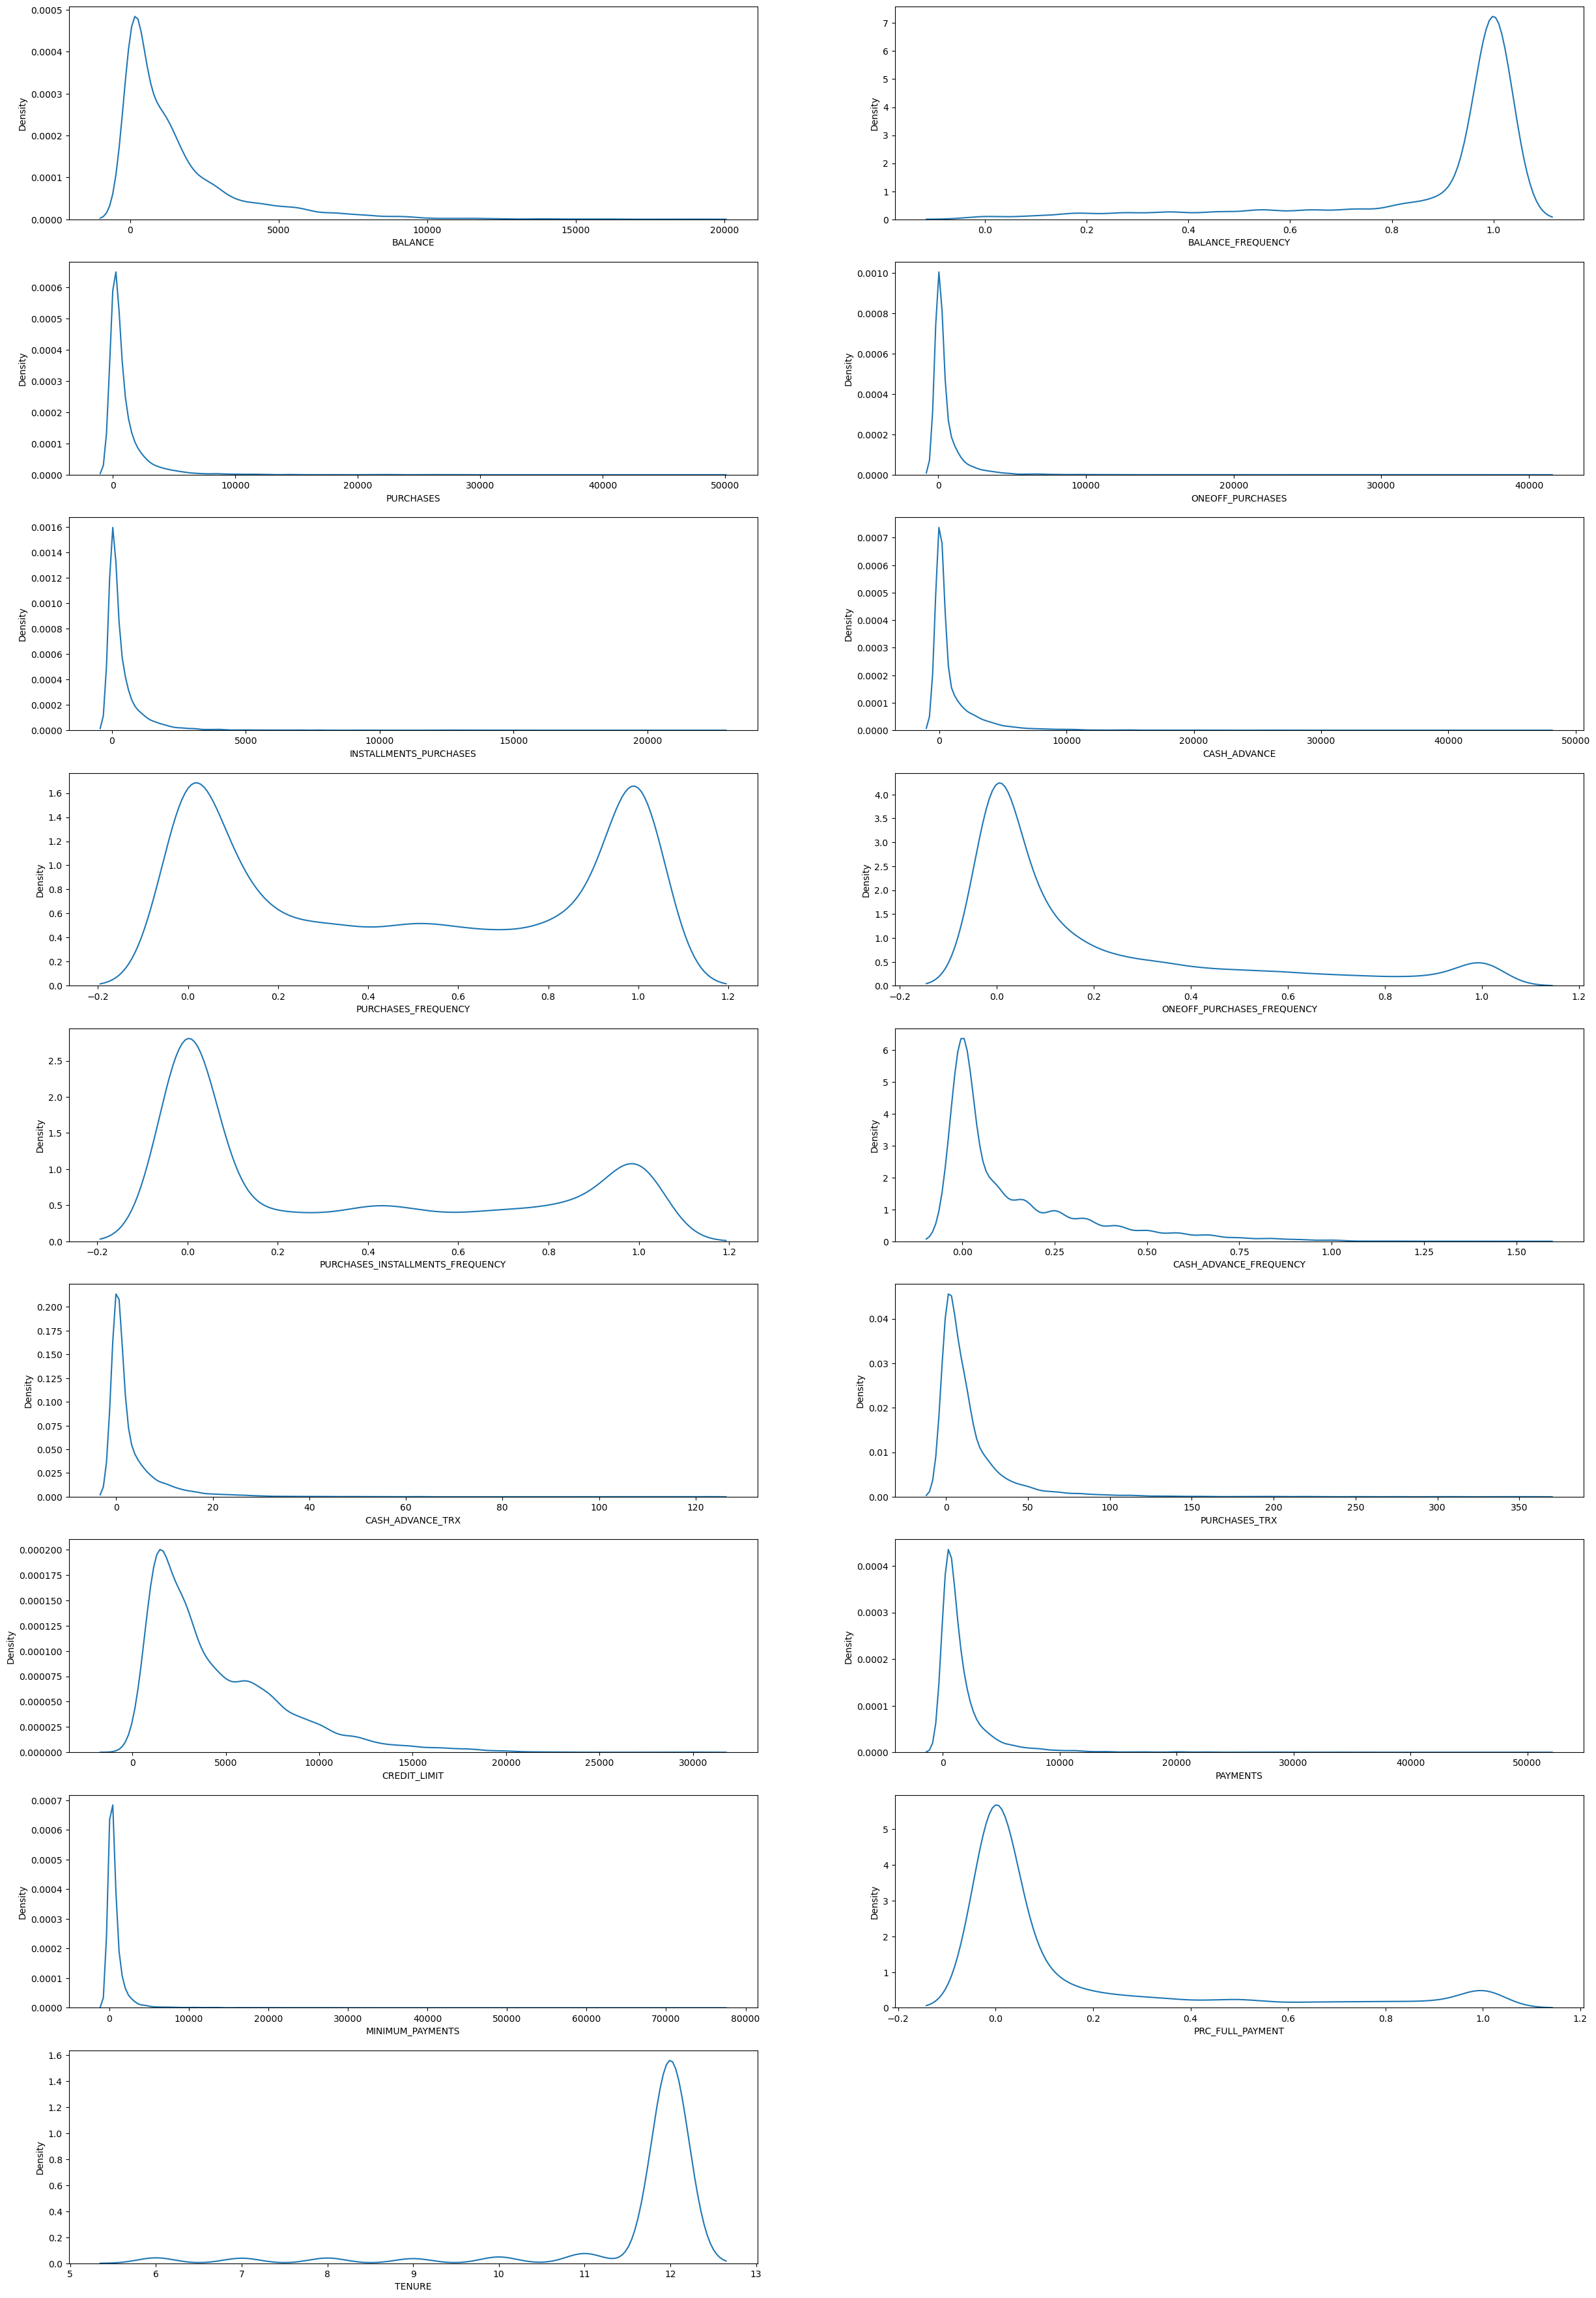

In [89]:
plt.figure(figsize=(30, 45))
for i, column in enumerate(df.columns):
    if df[column].dtype != 'object':
        ax = plt.subplot(9, 2, i + 1)
        sns.kdeplot(df[column], ax=ax)
        plt.xlabel(column)

plt.show()

The data is heavily skewed in each feature.

### Correlation

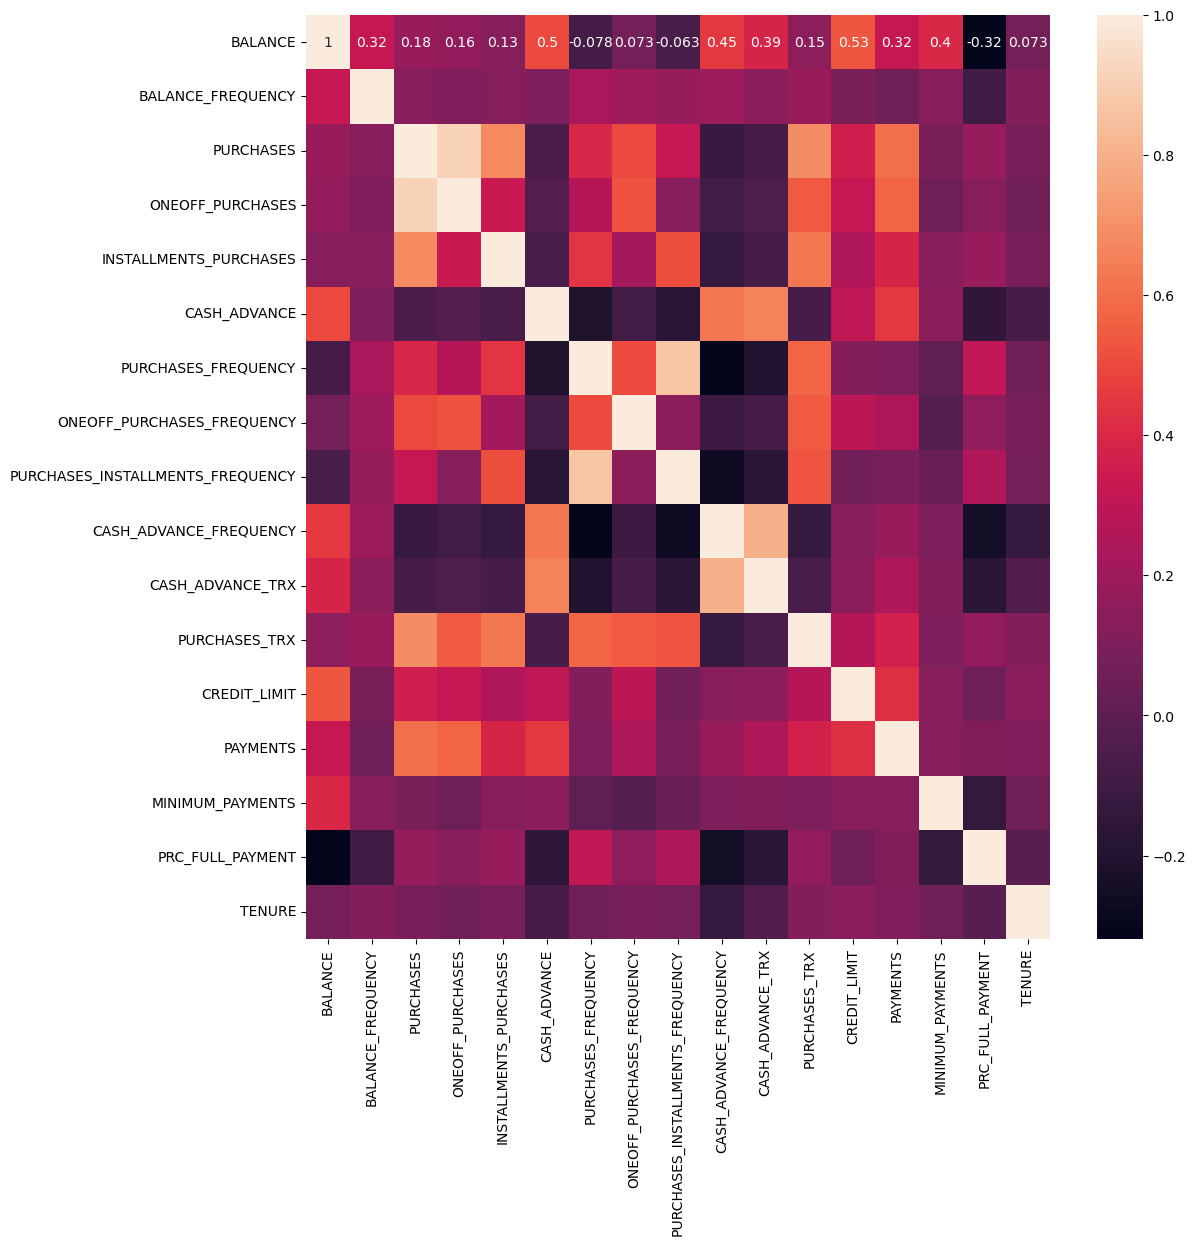

In [90]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Low Correlation between features

## Scaling Data

In [91]:
scaled_df = scalar.fit_transform(df)

In [92]:
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

## Dimensionality Reduction
Converting the DataFrame into 2D DataFrame for visualization

In [93]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.683648,-1.072244
1,-1.134080,2.509118
2,0.969394,-0.383568
3,-0.888221,0.004651
4,-1.600020,-0.683799
...,...,...
8945,-0.362572,-2.013432
8946,-0.580813,-1.675644
8947,-0.928986,-1.808042
8948,-2.337845,-0.653606


## Model Building

### K-Means

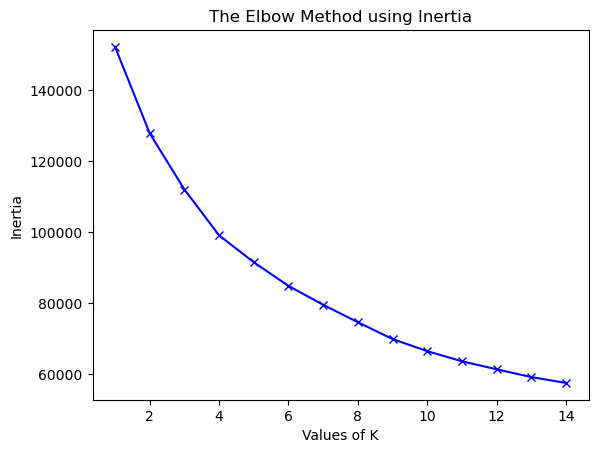

In [94]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

       PCA1      PCA2  cluster
0 -1.683648 -1.072244        0
1 -1.134080  2.509118        2
2  0.969394 -0.383568        3
3 -0.888221  0.004651        0
4 -1.600020 -0.683799        0


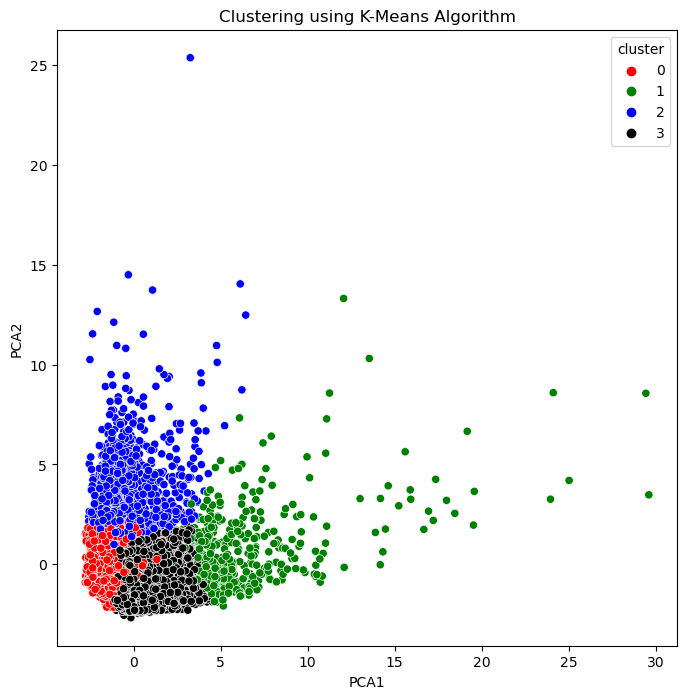

In [95]:
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
print(pca_df_kmeans.head())

plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

### DBScan

In [96]:
from sklearn.metrics import silhouette_score

In [97]:
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(2, 10)

best_score = -1
best_params = {}

# Grid Search
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(pca_df[["PCA1", "PCA2"]])
        
        # Ignore if all points are within noise
        if len(set(labels)) <= 1:
            continue
        
        # Compute silhouette score
        score = silhouette_score(pca_df[["PCA1", "PCA2"]], labels)
        print(f"eps: {eps}, min_samples: {min_samples}, silhouette score: {score}")
        
        if score > best_score:
            best_score = score
            best_params = {"eps": eps, "min_samples": min_samples}

# Best Results
print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score}")

eps: 0.1, min_samples: 2, silhouette score: -0.3837641336797884
eps: 0.1, min_samples: 3, silhouette score: -0.3251805045321236
eps: 0.1, min_samples: 4, silhouette score: -0.2911047975857226
eps: 0.1, min_samples: 5, silhouette score: -0.4108005662319228
eps: 0.1, min_samples: 6, silhouette score: -0.4341668711757805
eps: 0.1, min_samples: 7, silhouette score: -0.48598584964811886
eps: 0.1, min_samples: 8, silhouette score: -0.5313631537574802
eps: 0.1, min_samples: 9, silhouette score: -0.5528194486392781
eps: 0.2, min_samples: 2, silhouette score: 0.1255175752935429
eps: 0.2, min_samples: 3, silhouette score: 0.14807938725692465
eps: 0.2, min_samples: 4, silhouette score: 0.14378760360173098
eps: 0.2, min_samples: 5, silhouette score: 0.13413254419852408
eps: 0.2, min_samples: 6, silhouette score: 0.0950245273103514
eps: 0.2, min_samples: 7, silhouette score: 0.06449559418189998
eps: 0.2, min_samples: 8, silhouette score: 0.02082136574669085
eps: 0.2, min_samples: 9, silhouette scor

Best DBScan Model using Best Parameters and Best Silhouette Score

       PCA1      PCA2  Cluster
0 -1.683648 -1.072244        0
1 -1.134080  2.509118        0
2  0.969394 -0.383568        0
3 -0.888221  0.004651        0
4 -1.600020 -0.683799        0


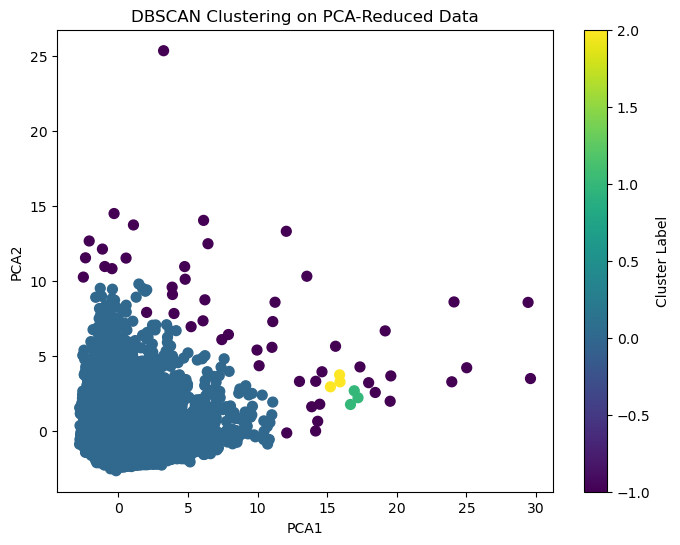

In [98]:
dbscan = DBSCAN(eps=0.9, min_samples=3)
dbscan_labels = dbscan.fit_predict(pca_df)

pca_df['Cluster'] = dbscan_labels


print(pca_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PCA1"], pca_df["PCA2"], c=pca_df["Cluster"], cmap="viridis", s=50)
plt.title("DBSCAN Clustering on PCA-Reduced Data")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster Label")
plt.show()

### Meanshift

       PCA1      PCA2  Cluster
0 -1.683648 -1.072244        0
1 -1.134080  2.509118        0
2  0.969394 -0.383568        0
3 -0.888221  0.004651        0
4 -1.600020 -0.683799        0


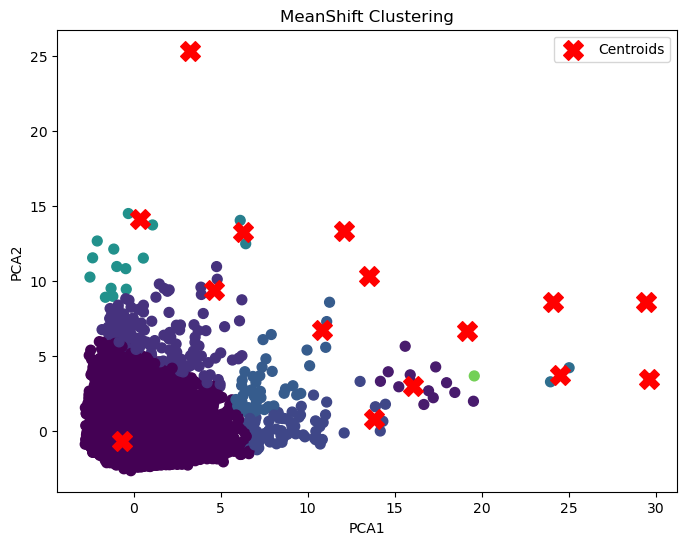

In [99]:
# Mean Shift Initialization
meanshift = MeanShift()
meanshift_labels = meanshift.fit_predict(pca_df[["PCA1", "PCA2"]])

# Add cluster labels to DataFrame
pca_df['Cluster'] = meanshift_labels

# Show results
print(pca_df.head())

# Visualize results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PCA1"], pca_df["PCA2"], c=pca_df["Cluster"], cmap="viridis", s=50)
plt.scatter(meanshift.cluster_centers_[:, 0], meanshift.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("MeanShift Clustering")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

### Hierarchical(Agglomerative Clustering)

       PCA1      PCA2  Cluster
0 -1.683648 -1.072244        3
1 -1.134080  2.509118        0
2  0.969394 -0.383568        2
3 -0.888221  0.004651        3
4 -1.600020 -0.683799        3


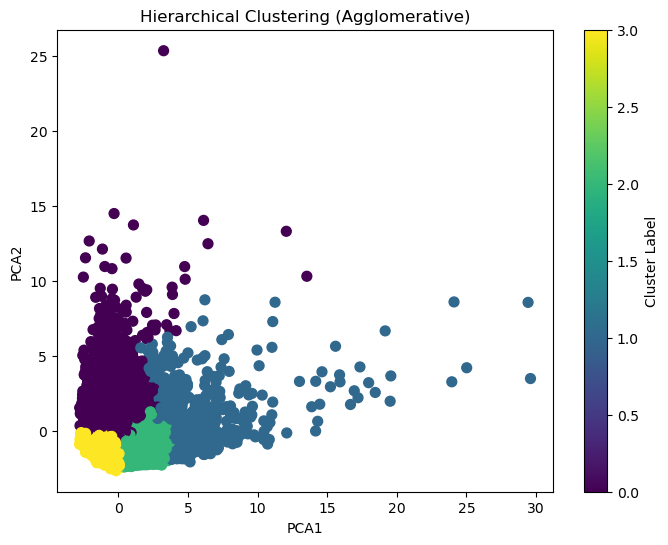

In [100]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')  
hierarchical_labels = hierarchical.fit_predict(pca_df[["PCA1", "PCA2"]])


pca_df['Cluster'] = hierarchical_labels


print(pca_df.head())


plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PCA1"], pca_df["PCA2"], c=pca_df["Cluster"], cmap="viridis", s=50)
plt.title("Hierarchical Clustering (Agglomerative)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster Label")
plt.show()

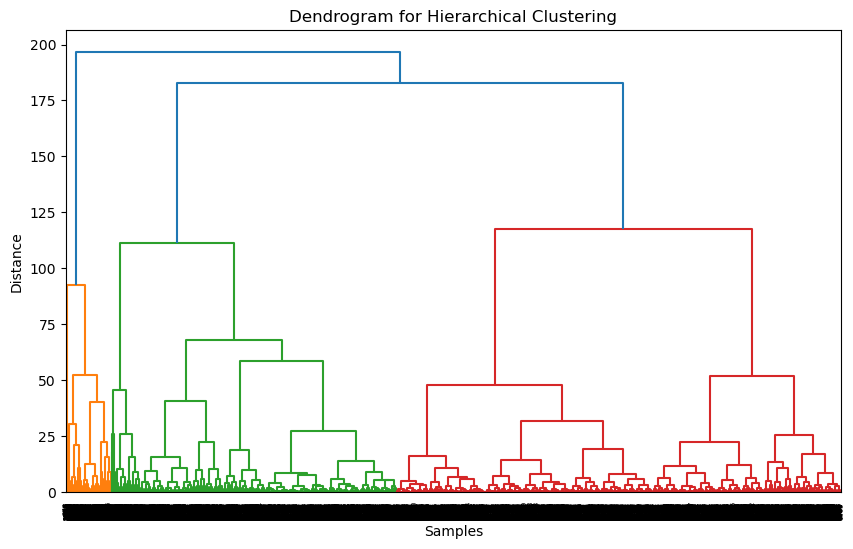

In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the adjacency matrix
Z = linkage(pca_df[["PCA1", "PCA2"]], method='ward')  # 'ward', 'single', 'complete', 'average' are options

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

## Model Evaluation

To determine which of the four models (DBSCAN, Hierarchical Clustering, K-Means, MeanShift) performs best, we need to evaluate them based on specific metrics.

**Silhouette Score** Measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).
Higher Silhouette Score are better.

In [102]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for each model
silhouette_dbscan = silhouette_score(pca_df[["PCA1", "PCA2"]], dbscan_labels)
silhouette_hierarchical = silhouette_score(pca_df[["PCA1", "PCA2"]], hierarchical_labels)
silhouette_kmeans = silhouette_score(pca_df[["PCA1", "PCA2"]], kmeans_labels)
silhouette_meanshift = silhouette_score(pca_df[["PCA1", "PCA2"]], meanshift_labels)

print(f"Silhouette Score - DBSCAN: {silhouette_dbscan}")
print(f"Silhouette Score - Hierarchical: {silhouette_hierarchical}")
print(f"Silhouette Score - K-Means: {silhouette_kmeans}")
print(f"Silhouette Score - MeanShift: {silhouette_meanshift}")


Silhouette Score - DBSCAN: 0.7833831507770298
Silhouette Score - Hierarchical: 0.3036202354254992
Silhouette Score - K-Means: 0.40735899996131103
Silhouette Score - MeanShift: 0.5552594199042943


**Davies-Bouldin Index** Measures the ratio of within-cluster scatter to between-cluster separation.Lower values indicate better clustering.

In [103]:
from sklearn.metrics import davies_bouldin_score

# Calculate the davies bouldin Score for each model
db_index_dbscan = davies_bouldin_score(pca_df[["PCA1", "PCA2"]], dbscan_labels)
db_index_hierarchical = davies_bouldin_score(pca_df[["PCA1", "PCA2"]], hierarchical_labels)
db_index_kmeans = davies_bouldin_score(pca_df[["PCA1", "PCA2"]], kmeans_labels)
db_index_meanshift = davies_bouldin_score(pca_df[["PCA1", "PCA2"]], meanshift_labels)

print(f"Davies-Bouldin Index - DBSCAN: {db_index_dbscan}")
print(f"Davies-Bouldin Index - Hierarchical: {db_index_hierarchical}")
print(f"Davies-Bouldin Index - K-Means: {db_index_kmeans}")
print(f"Davies-Bouldin Index - MeanShift: {db_index_meanshift}")


Davies-Bouldin Index - DBSCAN: 1.1105758490610977
Davies-Bouldin Index - Hierarchical: 0.8880607098559337
Davies-Bouldin Index - K-Means: 0.8009941150561095
Davies-Bouldin Index - MeanShift: 0.5463503452727174


**Calinski-Harabasz Index** Measures the ratio of between-cluster dispersion to within-cluster dispersion.Higher values indicate better clustering.

In [104]:
from sklearn.metrics import calinski_harabasz_score

# Calculate the calinski harabasz score for each model
ch_index_dbscan = calinski_harabasz_score(pca_df[["PCA1", "PCA2"]], dbscan_labels)
ch_index_hierarchical = calinski_harabasz_score(pca_df[["PCA1", "PCA2"]], hierarchical_labels)
ch_index_kmeans = calinski_harabasz_score(pca_df[["PCA1", "PCA2"]], kmeans_labels)
ch_index_meanshift = calinski_harabasz_score(pca_df[["PCA1", "PCA2"]], meanshift_labels)

print(f"Calinski-Harabasz Index - DBSCAN: {ch_index_dbscan}")
print(f"Calinski-Harabasz Index - Hierarchical: {ch_index_hierarchical}")
print(f"Calinski-Harabasz Index - K-Means: {ch_index_kmeans}")
print(f"Calinski-Harabasz Index - MeanShift: {ch_index_meanshift}")

Calinski-Harabasz Index - DBSCAN: 466.9086496468302
Calinski-Harabasz Index - Hierarchical: 4343.413324547446
Calinski-Harabasz Index - K-Means: 5819.14584953018
Calinski-Harabasz Index - MeanShift: 370.7560207848012


After computing the metrics, compare their values:

* Silhouette Score: Higher values are better.
* Davies-Bouldin Index: Lower values are better.
* Calinski-Harabasz Index: Higher values are better

### FINAL MODEL : KMEANS

In [105]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])

In [106]:
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1012.658327,0.789924,270.041785,209.937299,60.371441,596.509903,0.170145,0.086301,0.080558,0.114846,2.125471,2.903193,3278.640516,974.260054,553.900449,0.077981,11.446568
1,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
2,4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
3,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,639.677258,0.269258,11.594595


In [107]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [108]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.00,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,0
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12,0
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.00,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6,0
8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,0
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,312.343947,0.00,6,0
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0


In [109]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,1
57,2386.330629,1.000000,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12,1
84,1935.362486,1.000000,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1,50,9000.0,4921.066897,594.756686,0.000000,12,1
90,9381.255094,1.000000,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,4436.557694,1.000000,6005.90,5838.38,167.52,567.971877,1.000000,0.583333,0.916667,0.083333,1,61,10500.0,1650.425296,1067.515656,0.000000,12,1
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12,1
8662,599.909949,1.000000,4947.32,3149.59,1797.73,0.000000,1.000000,1.000000,0.916667,0.000000,0,73,3000.0,5024.430008,218.172915,0.083333,12,1
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12,1


In [110]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,2
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,2
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,2
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7,2
8858,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,3000.0,726.683966,127.843735,0.000000,7,2
8869,2171.222526,1.000000,791.18,791.18,0.00,2056.602480,0.428571,0.428571,0.000000,0.571429,6,8,3000.0,300.088696,453.100425,0.000000,7,2
8915,381.341657,1.000000,78.00,0.00,78.00,934.808869,1.000000,0.000000,0.833333,0.666667,16,6,1000.0,143.118373,85.152441,0.000000,6,2


In [111]:
cluster_4_df = cluster_df[cluster_df["Cluster"] == 3]
cluster_4_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.00,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12,3
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.00,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12,3
7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.00,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12,3
10,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.00,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.00,12,3
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.25,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.25,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,130.838554,1.000000,591.24,0.00,591.24,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,475.523262,82.771320,1.00,6,3
8942,40.829749,1.000000,113.28,0.00,113.28,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,94.488828,86.283101,0.25,6,3
8945,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.50,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,275.861322,312.343947,0.00,6,3


## Visualization

([<matplotlib.axis.XTick at 0x19f09c72690>,
 [Text(0, 0, 'Cluster 1'),
  Text(1, 0, 'Cluster 2'),
  Text(2, 0, 'Cluster 3'),
  Text(3, 0, 'Cluster 4')])

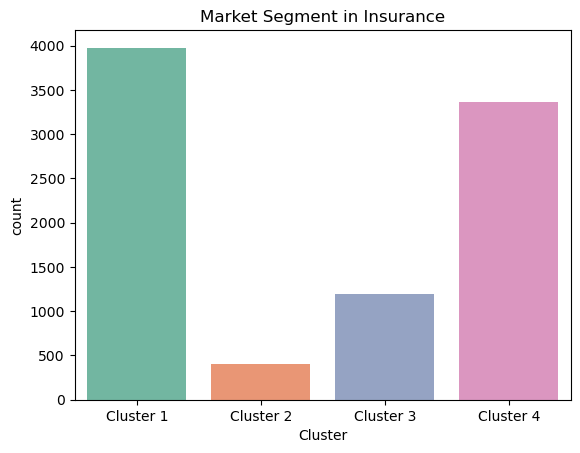

In [112]:
# Plotting the countplot
sns.countplot(x='Cluster', data=cluster_df, palette='Set2')
plt.title("Market Segment in Insurance")
# Renaming x-axis labels to your custom cluster names
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cluster 1", "Cluster 2", 
                                         "Cluster 3", "Cluster 4"])

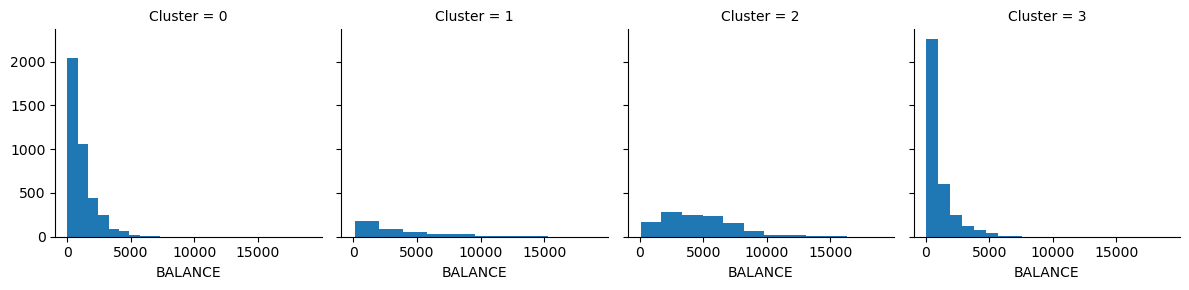

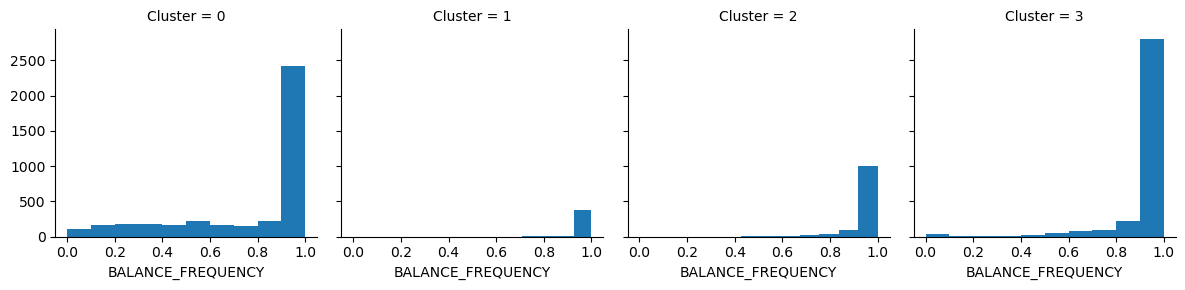

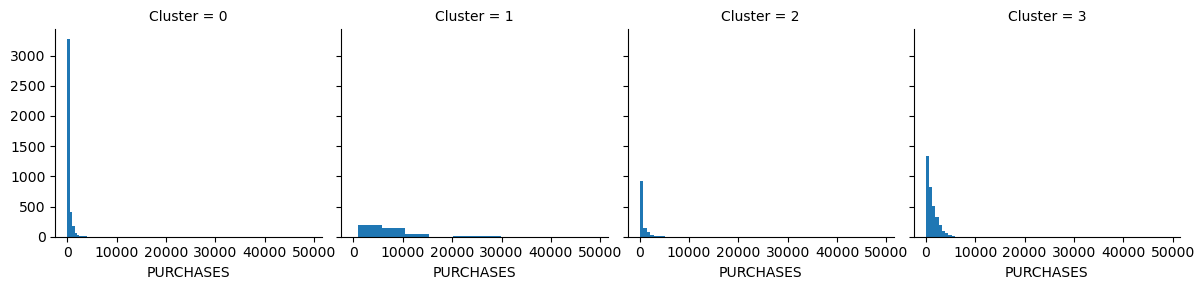

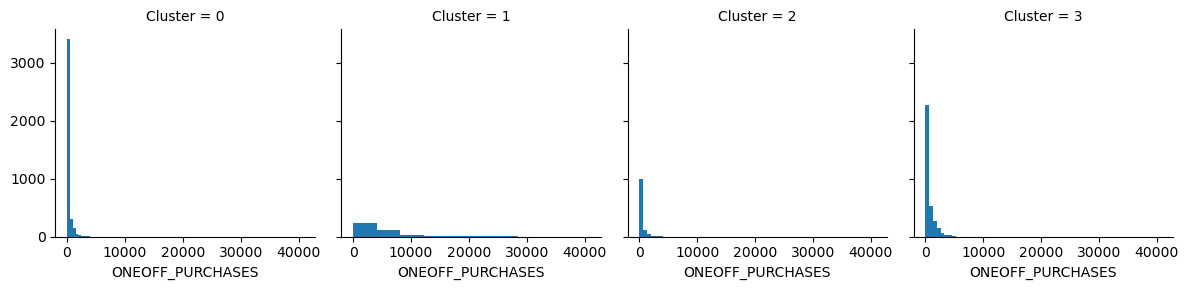

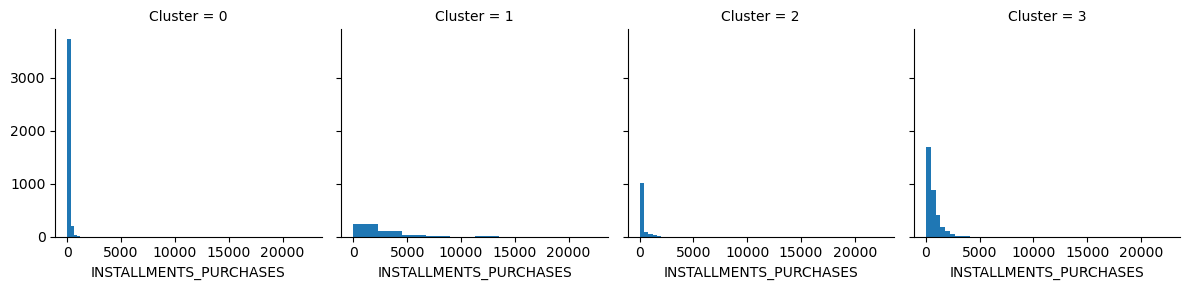

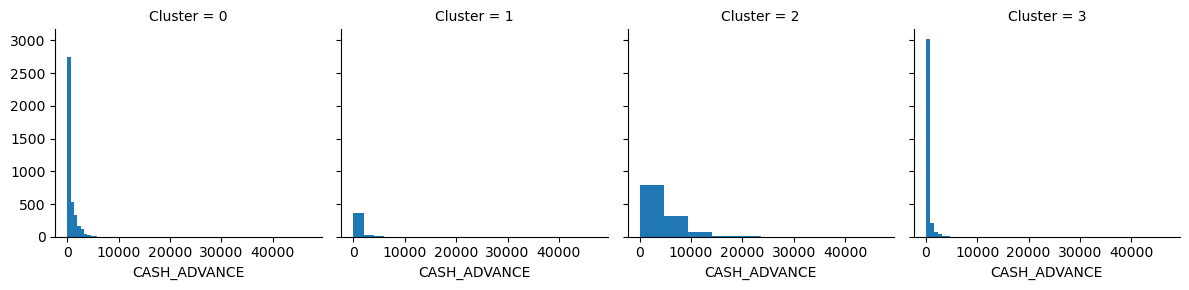

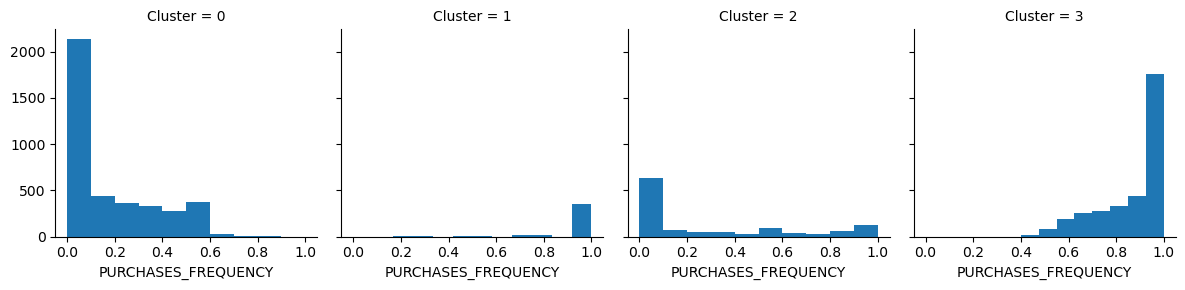

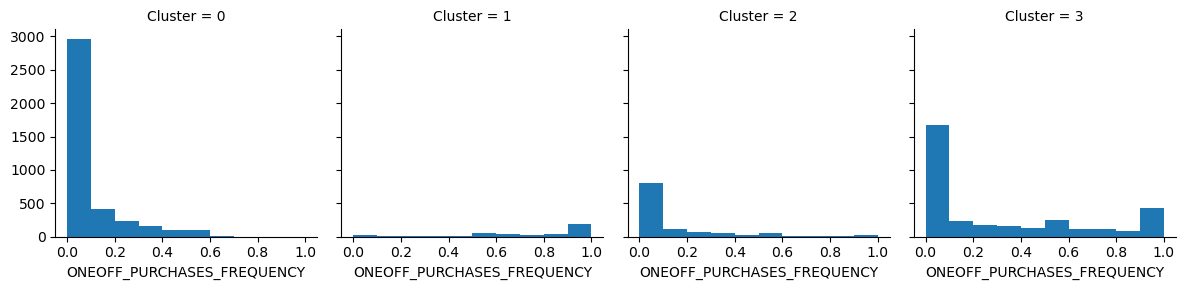

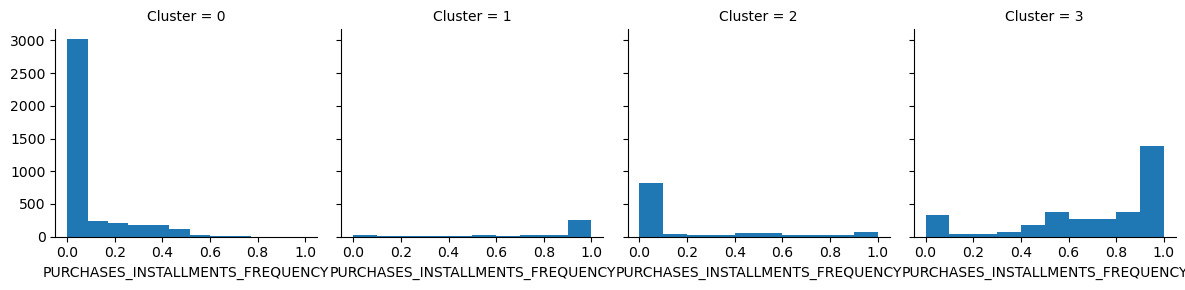

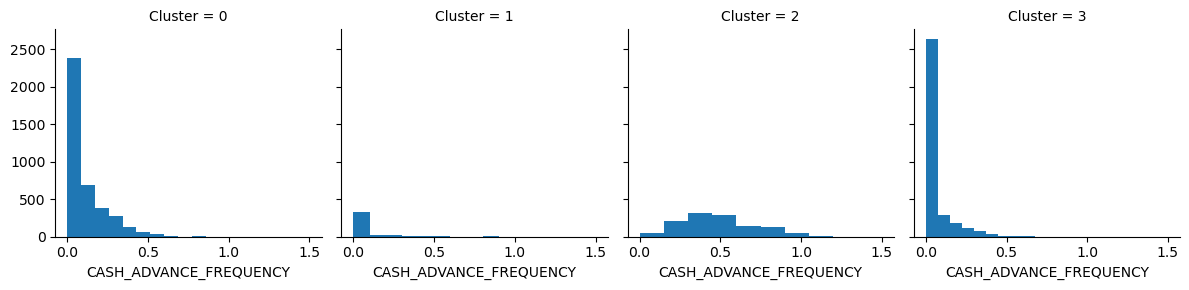

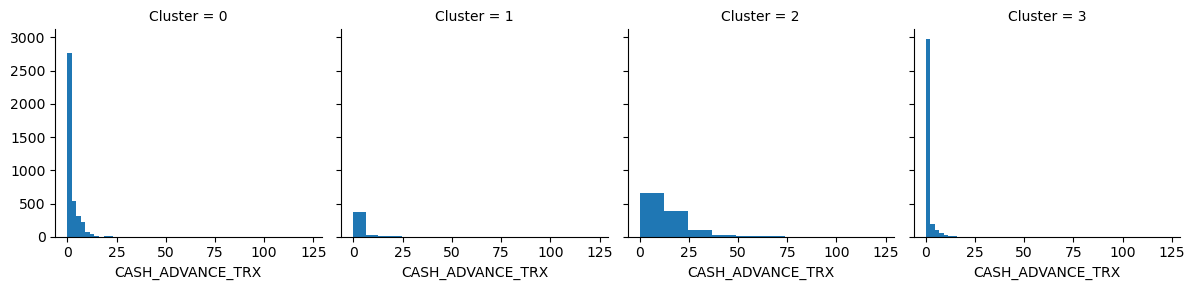

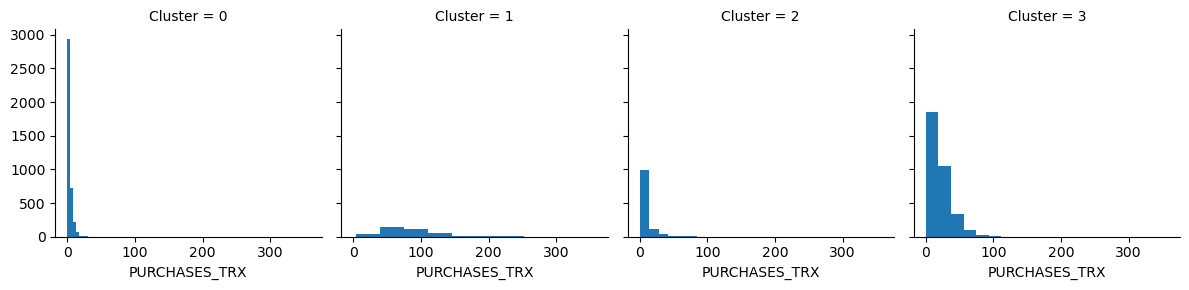

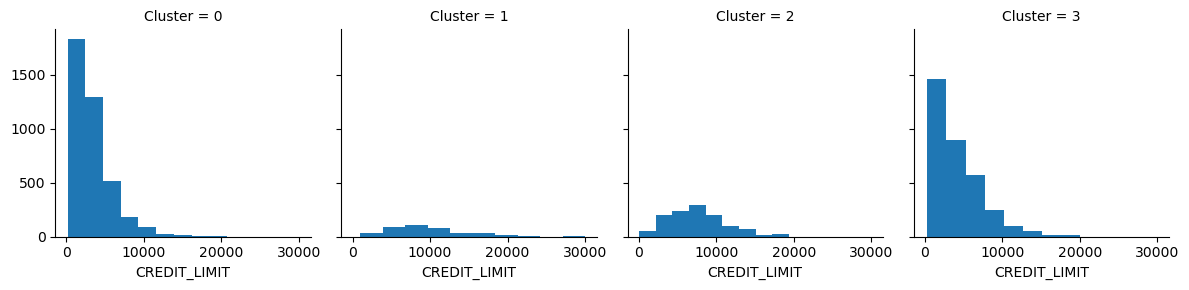

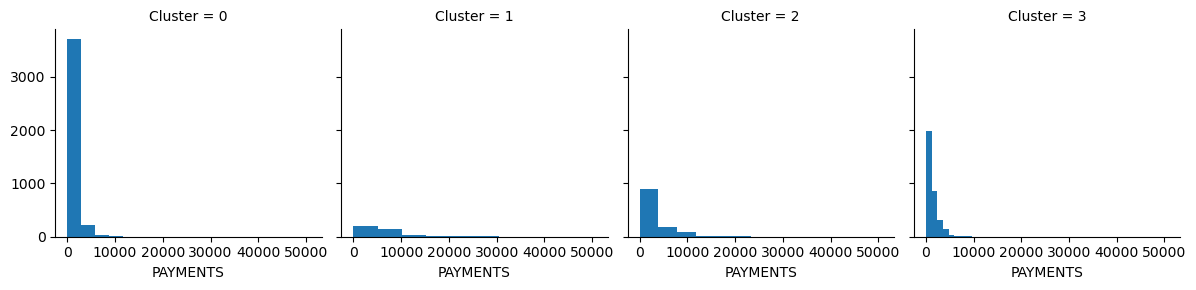

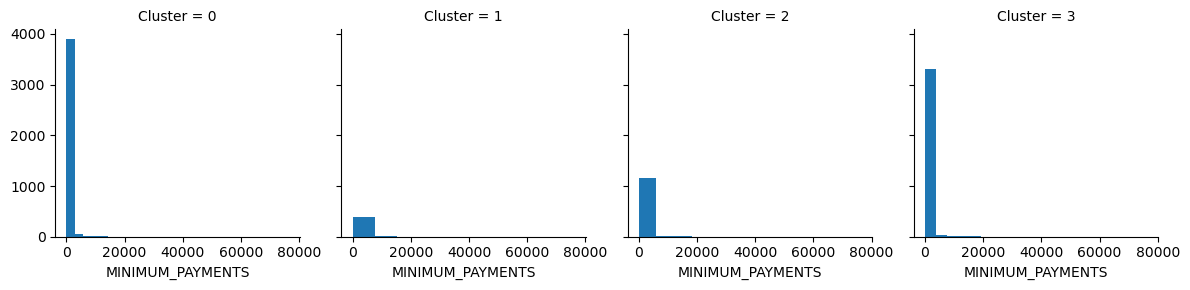

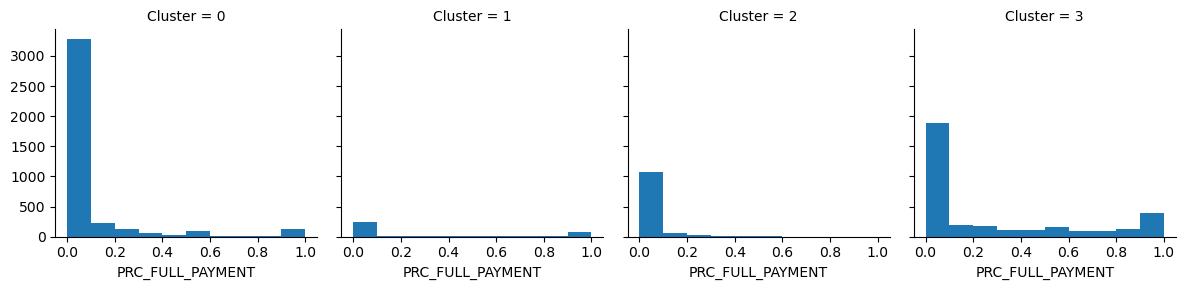

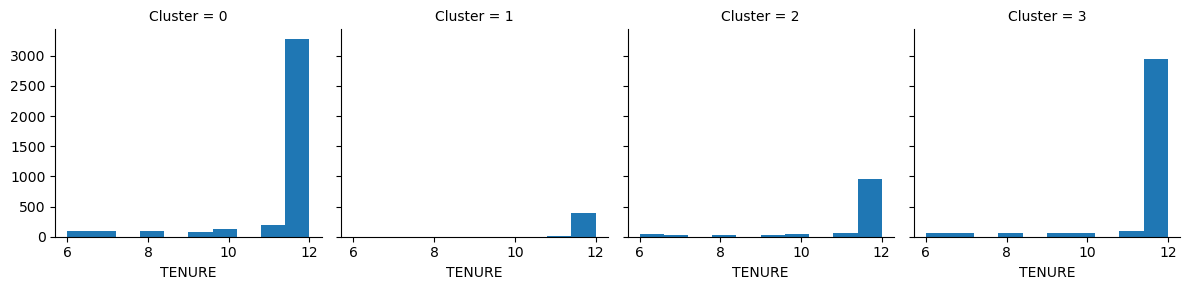

In [113]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

### Key Clusters
    
Cluster 1: **Low-Volume Pragmatists**
* Characterized by low financial activity and low credit utilization.
* Tend to maintain low balances and engage in minimal transactions, focusing on stability rather than volume.

Cluster 2: **High-Volume Power Users**
* Exhibit high transaction volumes and significant variability in credit limits.
* These are likely the heavy users of financial services, actively engaging with their accounts.

Cluster 3: **Diverse Low-Volume Users**
* Similar to Cluster 1 but with greater variability in their financial behavior.
* May indicate a inconsistent usage patterns.

Cluster 4: **Frequent Spenders**
* Resemble Cluster 2 but with a distinct focus on frequent purchases, particularly installment-based transactions.
* High variability in payment behaviors suggests a mix of disciplined and opportunistic spending habits.

# Saving the kmeans clustering model and the data with cluster label

In [114]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [115]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

In [ ]:
#kmeans